Assigning JSON file data to pandas DataFrame as guided in the dataset description.

In [2]:
def parse(path):
  g = open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Musical_Instruments_5.json')

Glimpse of dataset

In [171]:
df.head(12)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",-1.000000
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",92.857143
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",100.000000
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",-1.000000
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",-1.000000
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012",-1.000000
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014",-1.000000
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012",-1.000000
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008",-1.000000
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014",-1.000000


We find the following columns present in the DataFrame

In [4]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

These features are: <br/>
reviewerID: ID of the user reviewing the product <br/>
asin: Product ID <br/>
reviewerName: Name of the reviewer <br/>
helpful: A 2 element list in the form of string, where the second element denotes the number of people who read the review, and <br/>
the first element denotes the number of users who found the review helpful out of the ones who read <br/>
reviewText: Review itself in the form of text <br/>
overall: Numerical rating given by the reviewer to the product <br/>
summary: Textual summary of the review <br/>
unixReviewTime: Unix timestamp of the posting of the review <br/>
reviewTime: Normal timestamp

We want to find the helpfulness, i.e., how much useful a review is. It can be found using 'useful' field where we divide the first <br/>
element with second which tells us how many review readers found the review helpful.

A utility method to tell if the second element in the 'helpful' field is zero or not in which case the 'helpful' field <br/>
won't be of use.

In [5]:
def is_helpful_denominator_zero(helpful):
    if int(helpful[1]):
        return False
    return True

We find the percentage of helpful votes for a review.

In [6]:
def helpfulness_percentage(helpful):
    return (int(helpful[0]) / int(helpful[1])) * 100

If no one read the review, it's useless, else we allot it the percentage.

In [7]:
list = []
for index, row in df.iterrows():
    helpful = row['helpful']
    if is_helpful_denominator_zero(helpful):
        list.append(-1)
    else:
        list.append(helpfulness_percentage(helpful))

We create a new row and name it 'helpfulness'

In [9]:
df['helpfulness'] = list

In [10]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",-1.000000
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",92.857143
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",100.000000
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",-1.000000
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",-1.000000
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012",-1.000000
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014",-1.000000
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012",-1.000000
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008",-1.000000
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014",-1.000000


Pairplotting to show graphical inter-relation among the features.

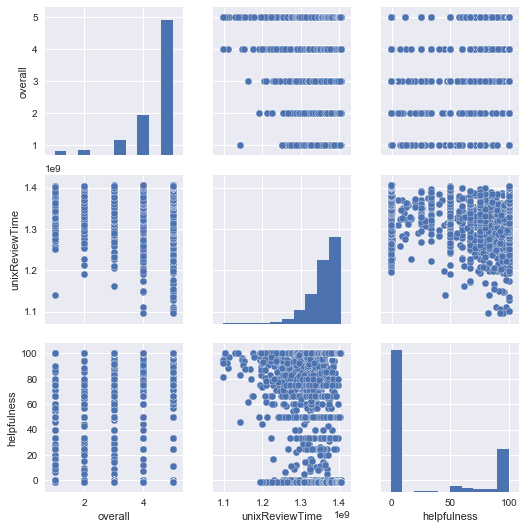

In [20]:
sns.pairplot(data = df, diag_kind = 'hist')
plt.show()

For correlation, we plot heat map and witness the inter-relations gracefully.

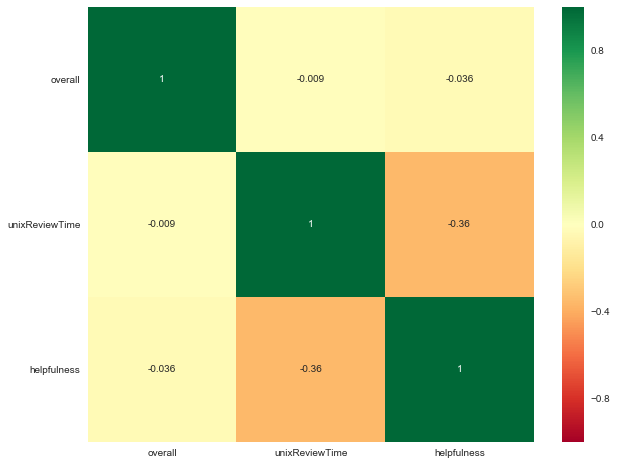

In [26]:
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')
plt.gcf().set_size_inches(10, 8)
plt.show()

We find the rating rank for various products.

In [55]:
df['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

We observe that rating 5 has been given to 6938 products, least rating 1 is for 217 products.

Now, for each type of rating, we see how useful various reviews are.

In [58]:
df[df['overall'] == 1]['helpfulness'].value_counts()

-1.000000      73
 0.000000      36
 100.000000    35
 50.000000     20
 75.000000      9
 66.666667      6
 33.333333      4
 25.000000      3
 57.142857      3
 60.000000      3
 40.000000      3
 54.545455      2
 9.090909       2
 11.764706      1
 71.428571      1
 85.714286      1
 78.571429      1
 26.153846      1
 13.157895      1
 77.500000      1
 10.891089      1
 20.000000      1
 45.833333      1
 28.571429      1
 6.666667       1
 90.000000      1
 12.500000      1
 26.315789      1
 16.666667      1
 86.666667      1
 80.000000      1
Name: helpfulness, dtype: int64

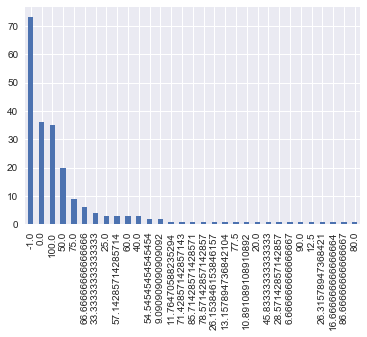

In [56]:
df[df['overall'] == 1]['helpfulness'].value_counts().plot(kind='bar')

73 reviews out of 217 for various products with rating 1 did not receive vote. <br/>
36 reviews out of 217 for various products with rating 1 were not found helpful. <br/>
25 reviews out of 217 for various products with rating 1 were found useful by 100% of voters. <br/>
20 reviews out of 217 for various products with rating 1 were found useful by 50% of voters.

In [61]:
df[df['overall'] == 2]['helpfulness'].value_counts()

-1.000000      103
 0.000000       40
 100.000000     34
 50.000000      26
 66.666667       7
 33.333333       5
 75.000000       5
 60.000000       4
 25.000000       3
 71.428571       2
 8.333333        2
 15.384615       1
 5.263158        1
 69.230769       1
 77.272727       1
 28.571429       1
 44.444444       1
 10.000000       1
 85.714286       1
 80.000000       1
 30.769231       1
 77.777778       1
 94.666667       1
 42.857143       1
 20.000000       1
 93.710692       1
 64.285714       1
 22.222222       1
 88.888889       1
 57.142857       1
Name: helpfulness, dtype: int64

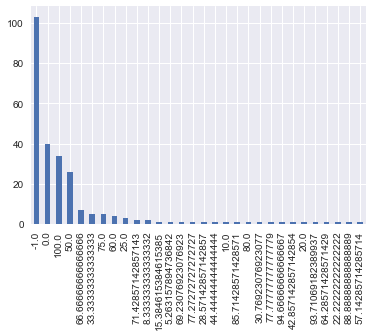

In [57]:
df[df['overall'] == 2]['helpfulness'].value_counts().plot(kind='bar')

103 reviews out of 250 for various products with rating 2 did not receive vote. <br/>
40 reviews out of 250 for various products with rating 2 were not found helpful. <br/>
34 reviews out of 250 for various products with rating 2 were found useful by 100% of voters. <br/>
26 reviews out of 250 for various products with rating 2 were found useful by 50% of voters.

In [65]:
df[df['overall'] == 3]['helpfulness'].value_counts()

-1.000000      421
 100.000000    125
 0.000000       79
 50.000000      40
 66.666667      22
 33.333333      10
 75.000000      10
 80.000000       8
 25.000000       5
 70.000000       3
 14.285714       2
 88.888889       2
 40.000000       2
 60.000000       2
 81.818182       2
 61.538462       2
 62.500000       2
 85.714286       2
 91.489362       1
 30.000000       1
 72.727273       1
 20.000000       1
 70.588235       1
 98.000000       1
 55.555556       1
 57.142857       1
 28.571429       1
 79.166667       1
 78.787879       1
 77.777778       1
 81.250000       1
 82.142857       1
 92.156863       1
 96.666667       1
 76.190476       1
 85.087719       1
 5.263158        1
 57.894737       1
 83.333333       1
 16.666667       1
 94.736842       1
 93.181818       1
 87.500000       1
 80.952381       1
 90.909091       1
 9.090909        1
 47.368421       1
 58.333333       1
 95.604396       1
 83.720930       1
 85.185185       1
Name: helpfulness, dtype: int64

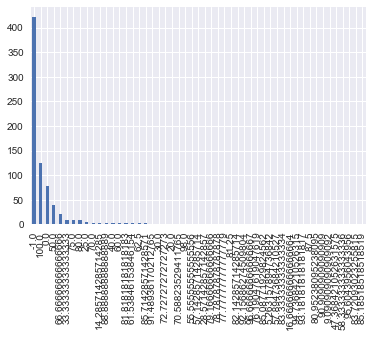

In [62]:
df[df['overall'] == 3]['helpfulness'].value_counts().plot(kind='bar')

421 reviews out of 772 for various products with rating 3 did not receive vote. <br/>
125 reviews out of 772 for various products with rating 3 were not found helpful. <br/>
79 reviews out of 772 for various products with rating 3 were found useful by 100% of voters. <br/>
40 reviews out of 772 for various products with rating 3 were found useful by 50% of voters.

In [70]:
df[df['overall'] == 4]['helpfulness'].value_counts()

-1.000000      1355
 100.000000     451
 0.000000        80
 50.000000       44
 66.666667       25
 75.000000       20
 80.000000        9
 83.333333        7
 90.000000        6
 33.333333        6
 87.500000        5
 85.714286        5
 60.000000        5
 90.909091        4
 92.307692        4
 88.888889        4
 25.000000        4
 84.615385        3
 91.666667        3
 93.333333        3
 77.777778        2
 94.117647        2
 71.428571        2
 91.836735        1
 97.142857        1
 95.454545        1
 96.000000        1
 76.470588        1
 88.235294        1
 91.011236        1
 88.000000        1
 40.000000        1
 12.500000        1
 93.939394        1
 94.029851        1
 7.142857         1
 80.952381        1
 16.666667        1
 88.524590        1
 98.437500        1
 94.736842        1
 93.846154        1
 83.050847        1
 86.956522        1
 96.987952        1
 44.444444        1
 93.506494        1
 78.571429        1
 94.980695        1
 70.000000        1


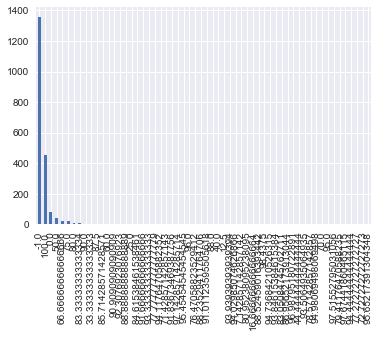

In [67]:
df[df['overall'] == 4]['helpfulness'].value_counts().plot(kind='bar')

1355 reviews out of 2084 for various products with rating 4 did not receive vote. <br/>
451 reviews out of 2084 for various products with rating 4 were not found helpful. <br/>
80 reviews out of 2084 for various products with rating 4 were found useful by 100% of voters. <br/>
40 reviews out of 2084 for various products with rating 4 were found useful by 50% of voters.

In [75]:
df[df['overall'] == 5]['helpfulness'].value_counts()

-1.000000      4844
 100.000000    1395
 0.000000       184
 50.000000      136
 66.666667       76
 75.000000       67
 80.000000       25
 85.714286       15
 87.500000       14
 60.000000       10
 83.333333       10
 92.307692        8
 33.333333        8
 71.428571        7
 90.000000        6
 88.888889        6
 89.473684        5
 91.666667        5
 90.909091        5
 93.333333        4
 25.000000        4
 92.857143        4
 95.238095        4
 93.750000        3
 95.454545        3
 96.428571        3
 77.777778        3
 94.117647        3
 94.736842        3
 82.352941        2
               ... 
 96.000000        1
 96.875000        1
 95.000000        1
 83.783784        1
 98.000000        1
 94.000000        1
 96.296296        1
 94.444444        1
 97.916667        1
 87.692308        1
 96.190476        1
 89.285714        1
 94.029851        1
 84.210526        1
 98.437500        1
 98.666667        1
 62.500000        1
 92.982456        1
 96.153846        1


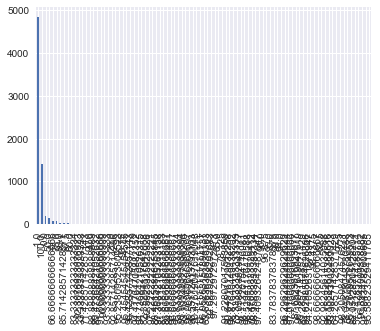

In [172]:
df[df['overall'] == 5]['helpfulness'].value_counts().plot(kind='bar')

4844 reviews out of 6938 for various products with rating 5 did not receive vote. <br/>
1355 reviews out of 6938 for various products with rating 5 were not found helpful. <br/>
184 reviews out of 6938 for various products with rating 5 were found useful by 100% of voters. <br/>
136 reviews out of 6938 for various products with rating 5 were found useful by 50% of voters.

Now, we proceed with review texts and ratings for prediction. Before that, we need to vectorize the text. <br/>
TF-IDF vectorization also weakens the power of stop-words as they add nothing useful to the picture.

In [94]:
X = df['reviewText']
y = df['overall']

X is input feature and y, the output in the train data.

In [81]:
tfidf = TfidfVectorizer(stop_words = 'english')
vector_X = tfidf.fit_transform(X)

In [84]:
print(vector_X)

  (0, 13704)	0.2726789285110533
  (0, 5309)	0.22438932628008842
  (0, 19983)	0.11919943867664876
  (0, 8877)	0.21166413815395202
  (0, 3179)	0.11848803638890258
  (0, 1493)	0.1536462137751413
  (0, 13699)	0.2269099418280564
  (0, 10725)	0.252233682131865
  (0, 4731)	0.21823929073785628
  (0, 14427)	0.21253404674031867
  (0, 16514)	0.1288087223671705
  (0, 13447)	0.3889856426431417
  (0, 7179)	0.518840763005823
  (0, 17374)	0.192151736525795
  (0, 6691)	0.16682799622198646
  (0, 5766)	0.11184939399228916
  (0, 20057)	0.237420243676136
  (1, 10476)	0.054175193839636794
  (1, 1803)	0.22461625921254316
  (1, 13322)	0.16927160625037285
  (1, 4071)	0.09641562909508604
  (1, 12365)	0.10311930436762715
  (1, 6814)	0.09876063079364159
  (1, 9966)	0.054798787328802646
  (1, 11926)	0.09350846937423078
  :	:
  (10260, 18156)	0.12667253857428726
  (10260, 2962)	0.13109575675067411
  (10260, 20031)	0.10996341723238157
  (10260, 15027)	0.13660457552252278
  (10260, 2561)	0.18630547871106554
  (10260,

In [85]:
print('Total features: ', vector_X.shape[1])

Total features:  20251


We need to split the train and the test data in ration 7:3

In [95]:
X_train, X_test, y_train, y_test = train_test_split(vector_X, y, test_size=0.30, random_state=42)

In [96]:
model_fit = LogisticRegression().fit(X_train, y_train)
print('Accuracy: ', model_fit.score(X_test, y_test))

Accuracy:  0.6765183501136732


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


We're getting an accuracy of 67 percent. This work can be improved using topic modelling to get a better representation of words. <br/>

In [157]:
prediction = model_fit.predict(X_test).tolist()

Converting numerical predictions to string viz 'negative', 'neutral', and 'postive'.

In [176]:
predicted_ratings = []
for i in prediction:
    if i == 1.0 or i == 2.0:
        predicted_ratings.append('negative')
    if i == 3.0:
        predicted_ratings.append('neutral')
    if i == 4.0 or i == 5.0:
        predicted_ratings.append('positive')